In [1]:
import pandas as pd

In [2]:
calendar = pd.read_csv(r"C:\Users\ASUS\Desktop\Airbnb EDA\calendar.csv")
listings = pd.read_csv(r"C:\Users\ASUS\Desktop\Airbnb EDA\listings.csv")
reviews = pd.read_csv(r"C:\Users\ASUS\Desktop\Airbnb EDA\reviews.csv")

## Dataset Exploration

In [3]:
print("Calendar dataset info:")
print(calendar.info())

Calendar dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [4]:
print("\nListings dataset info:")
print(listings.info())


Listings dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-nu

In [5]:
print("\nReviews dataset info:")
print(reviews.info())


Reviews dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


## Data Cleaning

In [6]:
calendar.fillna(value={'price': 0}, inplace=True) 

In [7]:
listings.drop_duplicates(subset='id', inplace=True)

In [8]:
print("Missing values in calendar dataset:")
print(calendar.isnull().sum())

Missing values in calendar dataset:
listing_id    0
date          0
available     0
price         0
dtype: int64


In [9]:
print("\nDuplicate rows in listings dataset:")
print(listings.duplicated().sum())


Duplicate rows in listings dataset:
0


## Average Daily Price Analysis

In [10]:
# Removing non-numeric characters from 'price' column
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculating the average price
average_price = calendar['price'].mean()

print("Average Price:", average_price)


Average Price: 92.50720380031143


## Price Distribution

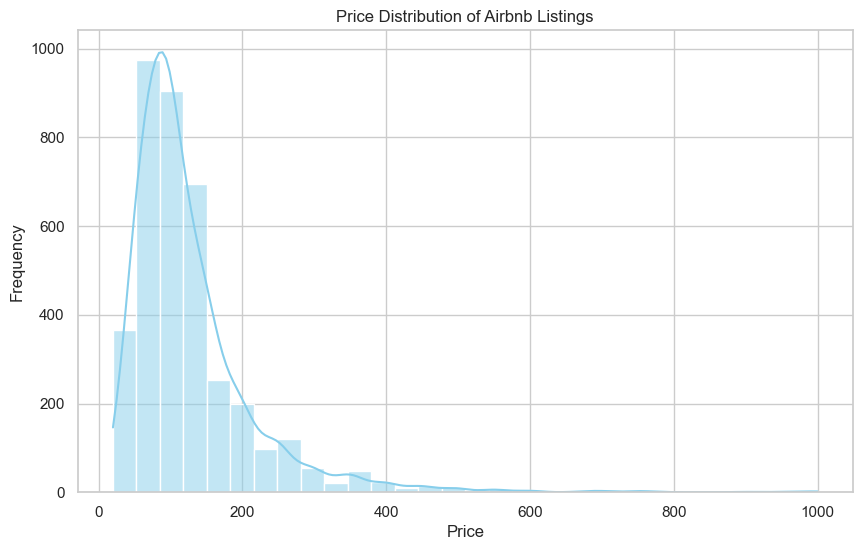

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(subset_df_simple['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Property Type Analysis


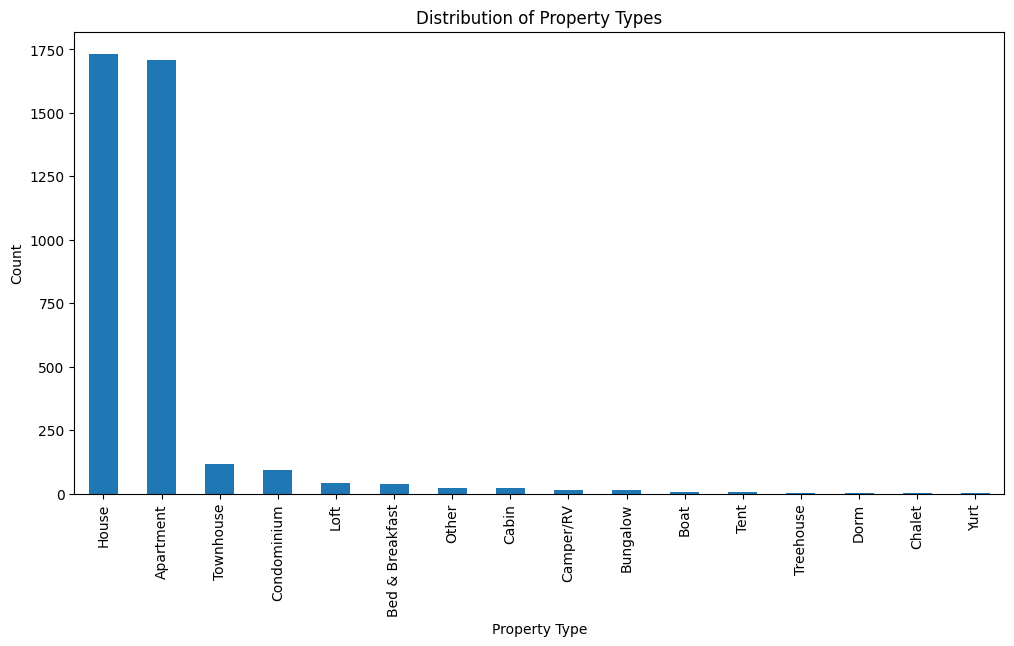

In [18]:
property_distribution = listings['property_type'].value_counts()

plt.figure(figsize=(12, 6))
property_distribution.plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()


## Room Type Preferences

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31996\999530301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=listings, palette='viridis')


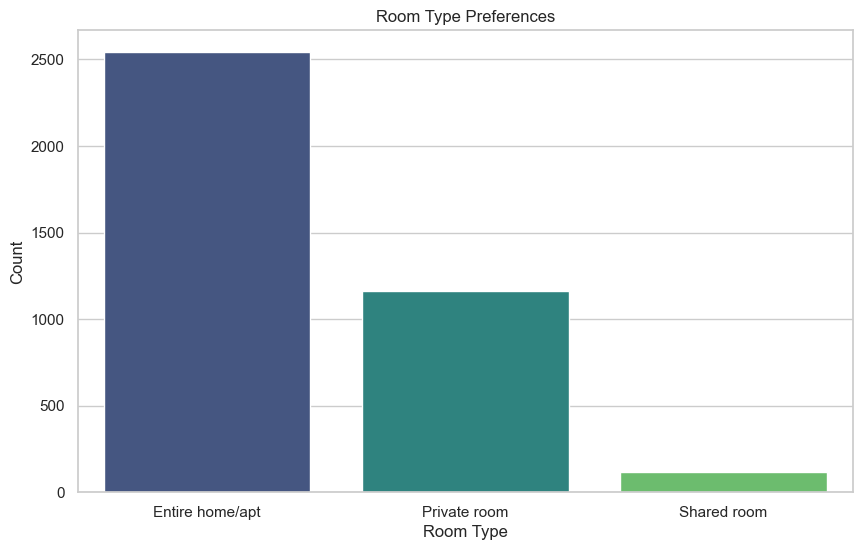

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=listings, palette='viridis')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

## Number of Listings by Neighborhood


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31996\363602960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette='plasma')


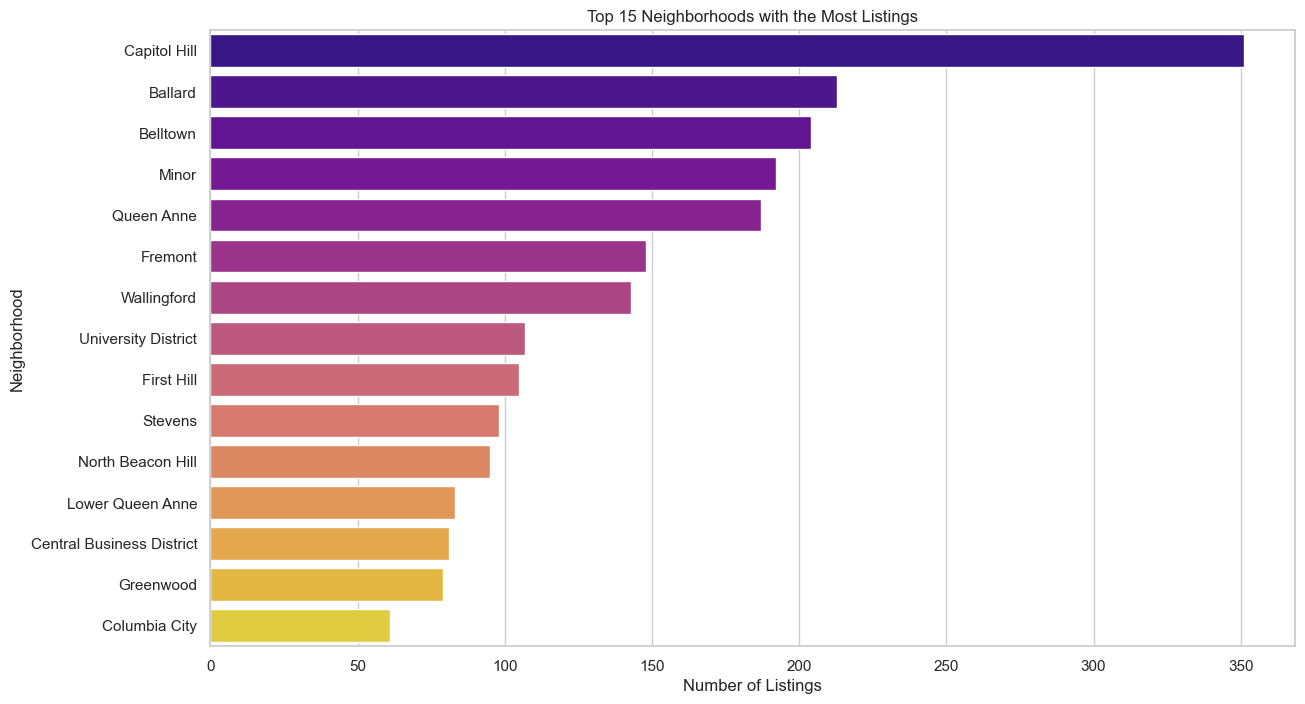

In [44]:
plt.figure(figsize=(14, 8))                                                           
neighborhood_counts = listings['neighbourhood'].value_counts().head(15)
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette='plasma')
plt.title('Top 15 Neighborhoods with the Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show() 


## Geographic analysis

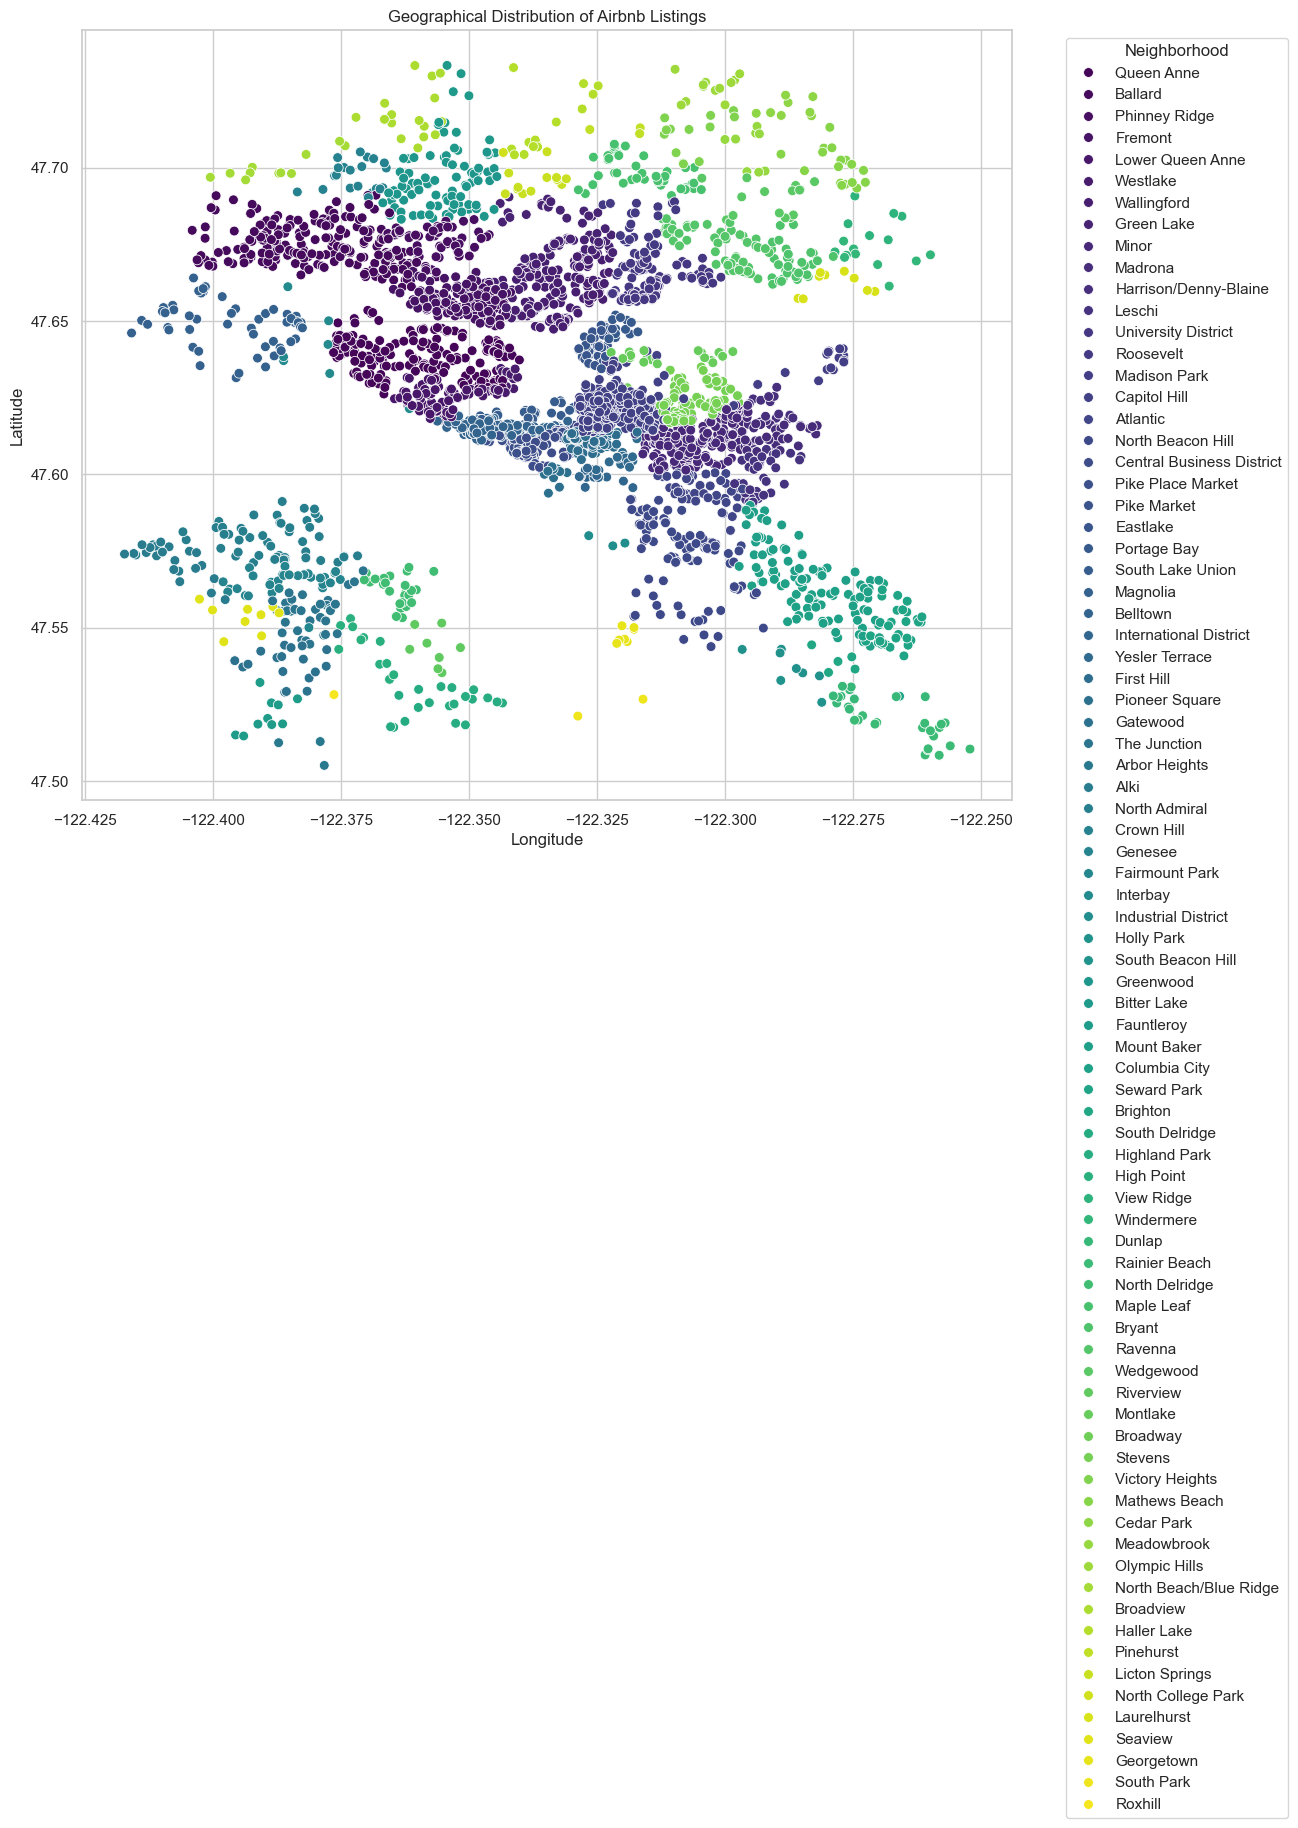

In [42]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='longitude', y='latitude', data=listings, hue='neighbourhood', palette='viridis', s=50)
plt.title('Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
print("Column names in 'reviews' DataFrame:", reviews.columns)


Column names in 'reviews' DataFrame: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


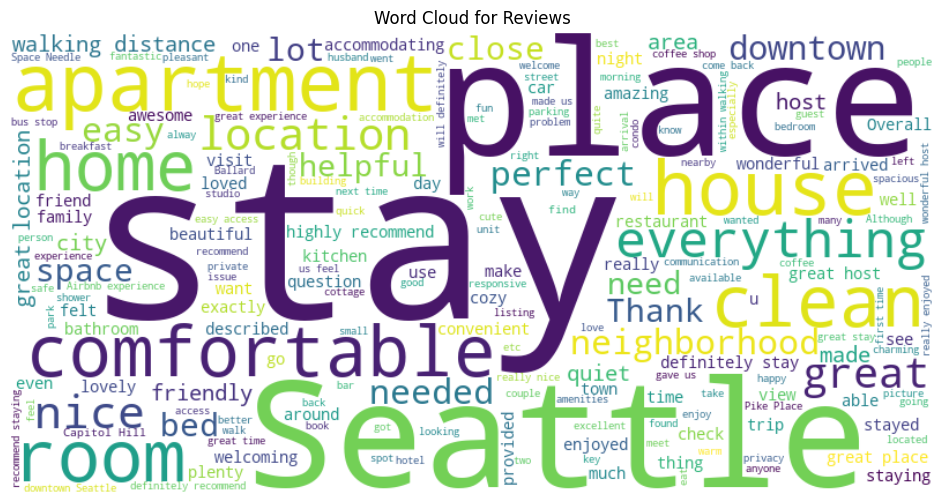

In [25]:
from wordcloud import WordCloud

# Word Cloud for Reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews['comments'].dropna()))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


## Time Series Analysis

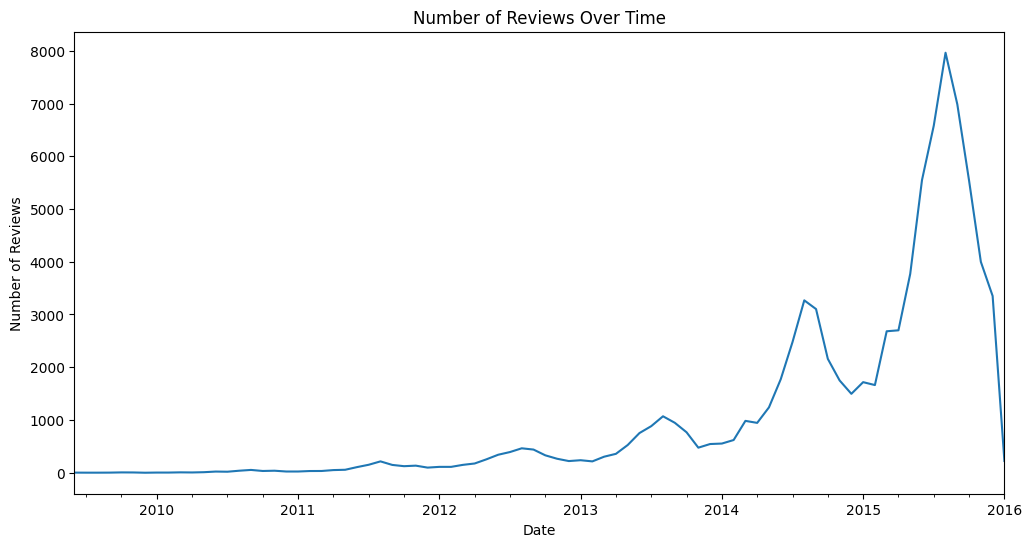

In [27]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews_time_series = reviews.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
reviews_time_series.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


## Correlation Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31996\807191242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_simple['price'] = subset_df_simple['price'].replace('[\$,]', '', regex=True).astype(float)


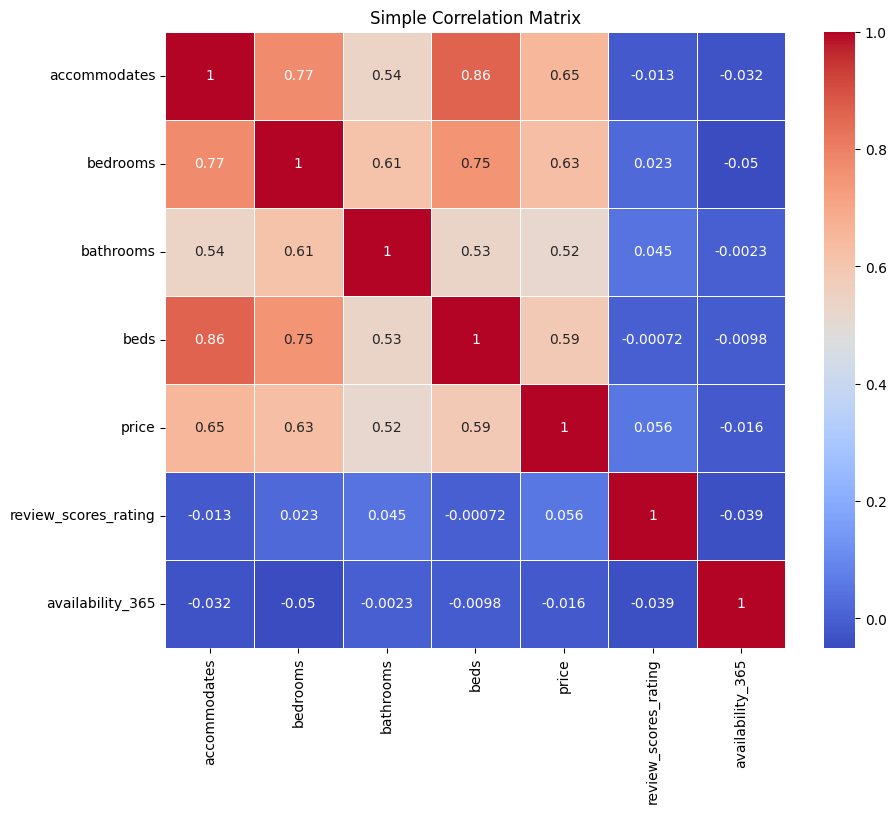

In [38]:
selected_columns_simple = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price', 'review_scores_rating', 'availability_365']
subset_df_simple = listings[selected_columns_simple]
subset_df_simple['price'] = subset_df_simple['price'].replace('[\$,]', '', regex=True).astype(float)
correlation_matrix_simple = subset_df_simple.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_simple, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Simple Correlation Matrix')
plt.show()
